# Spotify Song & Genre Analysis, Popularity Prediction and a Recommendation System

## Group Members:
*  Mert Kılıçaslan
*  Yunus Delipınar
*  Serhan Yorulmaz


## Introduction 


In this project, we will try to manipulate the data of spotify to analyse user habits and preferences. After the analysis, we will develop a recommendation system based on user preferences.

## Exploratory Data Analysis

### Visualizations Descriptive Statistics

In [ ]:
#This cell imports required libraries and features for data science. Numpy, pandas and matplotlib are these libraries.
#Also, this cell imports required data to the system.

from google.colab import drive
drive.mount("./drive", force_remount=True)
path_prefix = "./drive/My Drive"

from os.path import join
import pandas as pd  #an alias for pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
fname = "data.csv" #This is our data.
join(path_prefix, fname)
df = pd.read_csv(join(path_prefix, fname))
df.head()

Mounted at ./drive


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [ ]:
df.describe() 

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [ ]:
df.shape

(174389, 19)

In [ ]:
df.dtypes #types of datasets

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [ ]:
df.isna().sum()  #To see there is a NA value or not

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

### Visualizations of Aggregated Forms Based on Features




In [ ]:
df.groupby(["name"]).mean().sort_values("tempo", ascending = False)  ## listing the songs according to their tempo

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
name,,,,,,,,,,,,,,,
I Don't Want You on My Mind,0.4970,0.535,277221.0,0.3800,0.0,0.257000,11.0,0.0720,-13.790,0.0,32.0,0.0497,243.507,0.8280,1972.0
Call The Doctor,0.1980,0.466,147200.0,0.1880,0.0,0.657000,1.0,0.0820,-18.309,0.0,49.0,0.0547,243.372,0.6150,1972.0
Candyman - 2013 Remaster,0.2610,0.332,373970.0,0.4230,0.0,0.000140,0.0,0.0716,-12.102,1.0,42.0,0.0384,236.799,0.5190,1970.0
Surrender - 2005 Remastered Version,0.0841,0.157,229840.0,0.5000,0.0,0.688000,6.0,0.2230,-14.337,0.0,27.0,0.0464,224.437,0.3590,1988.0
Undenied,0.4500,0.241,260027.0,0.2810,0.0,0.000007,0.0,0.0937,-8.726,1.0,45.0,0.0416,222.605,0.0321,1997.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Carmen (1997 - Remaster), Act I: Quels regardes! Quelle effronterie!",0.9450,0.000,55693.0,0.1720,0.0,0.000083,3.0,0.8500,-21.578,1.0,24.0,0.0000,0.000,0.0000,1964.0
"Embraceable You - Live At Carnegie Hall, New York / 1949",0.9800,0.000,635067.0,0.0947,0.0,0.778000,5.0,0.8610,-16.371,1.0,13.0,0.0000,0.000,0.0000,1949.0
Das Vermächtnis,0.4930,0.000,129722.0,0.0134,0.0,0.000000,8.0,0.5040,-26.028,1.0,0.0,0.0000,0.000,0.0000,1941.0


In [ ]:
df.groupby(["name"]).mean().sort_values("valence", ascending = False)  ## listing the songs according to their valence

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
name,,,,,,,,,,,,,,,
Electric Zoo,0.0180,0.723,35613.0,0.84400,0.0,0.887000,10.0,0.0341,-8.684,0.0,48.0,0.0719,164.920,1.000,2005.0
Chatter,0.9400,0.738,18855.0,0.31400,0.0,0.211000,1.0,0.5640,-11.818,1.0,0.0,0.8580,119.255,1.000,1937.0
Les Petites Marionettes,0.3390,0.878,51547.0,0.25500,0.0,0.000010,2.0,0.0876,-14.140,1.0,41.0,0.0753,106.649,1.000,1977.0
Pasito Duranguense,0.0776,0.912,200213.0,0.82400,0.0,0.541000,9.0,0.0260,-5.163,1.0,50.0,0.0831,144.925,1.000,2002.0
2000 Light Years Away (8-Bit Computer Game Version),0.0289,0.673,133454.0,0.95000,0.0,0.630000,5.0,0.0690,-7.899,1.0,0.0,0.2920,192.816,0.997,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
White Noise - 500 hz,0.9230,0.000,147097.0,0.00005,0.0,0.297000,10.0,0.1100,-32.354,0.0,78.0,0.0000,0.000,0.000,2017.0
Chole Jay Mori Hay Basanter Din,0.9940,0.000,183547.0,0.06180,0.0,0.724000,6.0,0.2730,-16.441,1.0,0.0,0.0000,0.000,0.000,1931.0
The Peaceful Shepherd,0.8650,0.000,40597.0,0.12600,0.0,0.000000,5.0,0.3060,-25.944,0.0,3.0,0.0000,0.000,0.000,1951.0


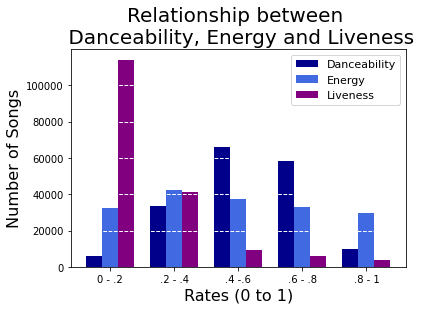

In [ ]:
#In this cell, the graph of number of songs according to their danceability, energy and liveness rates is plotted below.


def divide5(col_name): #In this function, the rates are seperated into 5 equal gaps.
  return [len(df.loc[df[col_name] < 0.2]),
    len(df.loc[(df[col_name] >= 0.2) & (df[col_name] < 0.4)]),
    len(df.loc[(df[col_name] >= 0.4) & (df[col_name] < 0.6)]),
    len(df.loc[(df[col_name] >= 0.6) & (df[col_name] < 0.8)]),
    len(df.loc[(df[col_name] >= 0.8) & (df[col_name] <= 1)])
] 

rates = ["0 - .2", ".2 - .4", ".4 -.6", ".6 - .8", ".8 - 1"]

#This part plots the graph.
plt.bar(np.arange(5)-.25, divide5("danceability"), color='darkblue', width = 0.25, label="Danceability")
plt.bar(np.arange(5), divide5("energy"), color='royalblue', width = 0.25, label="Energy")
plt.bar(np.arange(5)+.25, divide5("liveness"), color='purple', width = 0.25, label="Liveness")
plt.xticks(np.arange(5), rates)

plt.title("Relationship between \n Danceability, Energy and Liveness", size=20)
plt.xlabel("Rates (0 to 1)", size=16)
plt.ylabel("Number of Songs", size=16)

plt.grid(color='white', linestyle='--', linewidth=1, axis='y') #appearance of the graph is here.
plt.legend(fontsize=11)

plt.show()

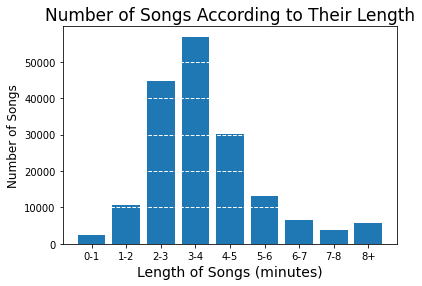

In [ ]:
#In this cell, the graph of number of songs according to their length is plotted below. 

#Following lines are to divide duration into smaller groups, every group represents 1 minute of length.
gap_list = [len(df[(df["duration_ms"] >= 0) & (df["duration_ms"] <= 60000)]),
  len(df[(df["duration_ms"] > 60000)  & (df["duration_ms"] <= 120000)]),
  len(df[(df["duration_ms"] > 120000) & (df["duration_ms"] <= 180000)]),
  len(df[(df["duration_ms"] > 180000) & (df["duration_ms"] <= 240000)]),
  len(df[(df["duration_ms"] > 240000) & (df["duration_ms"] <= 300000)]),
  len(df[(df["duration_ms"] > 300000) & (df["duration_ms"] <= 360000)]),
  len(df[(df["duration_ms"] > 360000) & (df["duration_ms"] <= 420000)]),
  len(df[(df["duration_ms"] > 420000) & (df["duration_ms"] <= 480000)]),
  len(df[(df["duration_ms"] > 480000)])
]

#This is where we plot the graph
plt.xlabel("Length of Songs (minutes)", size=14)
plt.ylabel("Number of Songs", size=12)
plt.title("Number of Songs According to Their Length", size=17)
plt.bar(["0-1","1-2","2-3","3-4","4-5","5-6","6-7","7-8","8+"],gap_list)


plt.grid(color='white', linestyle='--', linewidth=1, axis='y') #appearance of the graph is here.

plt.show()


In [ ]:
#In this function, we grouped thousands of genres into 7 main groups. 
#These group are pop, rock, metal, indie, folk, hip hop and jazz. 

fname1 = "data_by_genres.csv" #This is our data. We needed genres.
join(path_prefix, fname1)
df1 = pd.read_csv(join(path_prefix, fname1))
df1.replace("[]", np.nan, inplace=True)
df1=df1.dropna()
df1.groupby(["genres"]).mean().sort_values("popularity", ascending = False)
df1[df1["genres"].str.contains("pop", na=False)]


def categorize(name): #this function classifies the genres in more simplistic way
  if("pop" in name):
    return "Pop"
  elif("rock" in name):
    return "Rock"
  elif("metal" in name):
    return "Metal"
  elif("indie" in name):
    return "Indie"
  elif("folk" in name):
    return "Folk"
  elif("hip hop" in name):
    return "Hip hop"
  elif("jazz" in name):
    return "Jazz"
  elif("rap" in name):
    return "Rap"
  elif("house" in name):
   return "House"
  elif("country" in name):
    return "Country"
  else:
    return "not classified"

df1["type"] = df1["genres"].apply(categorize)

#We will find their specificed features accordingly in the next cell.


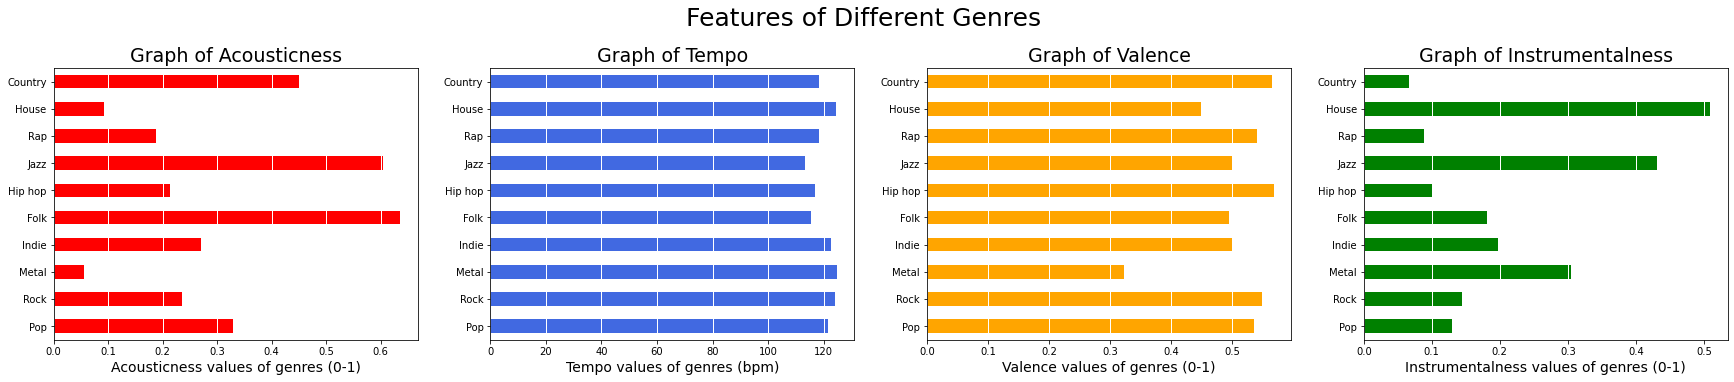

In [ ]:
#In this cell, 4 different graphs are plotted. 
#In every graph, different features of 10 main genres plotted.
#First graph is acousticness, second graph is tempo and third graph is valence and last graph is intrumentalness

fig = plt.figure(figsize=(30,5))

ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
name_list = ['Pop', 'Rock', 'Metal', 'Indie', 'Folk','Hip hop','Jazz','Rap','House',"Country"]

ax1 = df1.groupby(by="type").mean()["acousticness"][name_list].plot(kind="barh", color="red",ax=ax1)
ax2 = df1.groupby(by="type").mean()["tempo"][name_list].plot(kind="barh", color="royalblue", ax=ax2)
ax3 = df1.groupby(by="type").mean()["valence"][name_list].plot(kind="barh", color="orange", ax=ax3)
ax4=  df1.groupby(by="type").mean()["instrumentalness"][name_list].plot(kind="barh", color="green", ax=ax4)
fig.suptitle("Features of Different Genres", y=1.05, fontsize=25)

#first graph (Acousticness)
ax1.set_title('Graph of Acousticness',size=19)
ax1.set_xlabel('Acousticness values of genres (0-1)',size=14)
ax1.set_ylabel(None)
ax1.grid(color='white', linestyle='-', linewidth=1, axis='x')

#second graph (Tempo)
ax2.set_title("Graph of Tempo",size=19)
ax2.set_xlabel('Tempo values of genres (bpm)',size=14)
ax2.set_ylabel(None)
ax2.grid(color='white', linestyle='-', linewidth=1, axis='x')

#third graph (Valence)
ax3.set_title('Graph of Valence',size=19)
ax3.set_xlabel('Valence values of genres (0-1)',size=14)
ax3.set_ylabel(None)
ax3.grid(color='white', linestyle='-', linewidth=1, axis='x')

#fourth graph (instrumentalness)
ax4.set_title('Graph of Instrumentalness',size=19)
ax4.set_xlabel('Instrumentalness values of genres (0-1)',size=14)
ax4.set_ylabel(None)
ax4.grid(color='white', linestyle='-', linewidth=1, axis='x')
plt.show()

### Analysis of the Most Popular Artists and Songs

In [ ]:
#This cell lists top 10 most popular songs.
pop_songs = df.groupby(["name"]).mean().sort_values("popularity", ascending = False)
pop_songs.head(10)
dftop10S = pop_songs[0:10]  #variable to be used later
pop_songs.head(10)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
name,,,,,,,,,,,,,,,
drivers license,0.7210,0.585,242014.0,0.436,1.0,0.000013,10.0,0.1050,-8.761,1.0,100.0,0.0601,143.874,0.132,2021.0
positions,0.4680,0.737,172325.0,0.802,1.0,0.000000,0.0,0.0931,-4.771,1.0,96.0,0.0878,144.015,0.682,2020.0
Mood (feat. iann dior),0.2210,0.700,140526.0,0.722,1.0,0.000000,7.0,0.2720,-3.558,0.0,96.0,0.0369,90.989,0.756,2020.0
Whoopty,0.1900,0.711,123429.0,0.598,1.0,0.000000,3.0,0.1500,-7.621,0.0,94.0,0.1820,140.175,0.737,2020.0
34+35,0.2370,0.830,173711.0,0.585,1.0,0.000000,0.0,0.2480,-6.476,1.0,94.0,0.0940,109.978,0.485,2020.0
WITHOUT YOU,0.2130,0.662,161385.0,0.413,1.0,0.000000,0.0,0.1340,-7.357,1.0,94.0,0.0299,93.005,0.467,2020.0
LA NOCHE DE ANOCHE,0.0303,0.856,203201.0,0.618,0.0,0.000000,7.0,0.0866,-4.892,1.0,94.0,0.2860,81.993,0.391,2020.0
Therefore I Am,0.2180,0.889,174321.0,0.340,0.0,0.130000,11.0,0.0550,-7.773,0.0,94.0,0.0697,94.009,0.716,2020.0
DÁKITI,0.4010,0.731,205090.0,0.573,1.0,0.000052,4.0,0.1130,-10.059,0.0,93.0,0.0544,109.928,0.145,2020.0


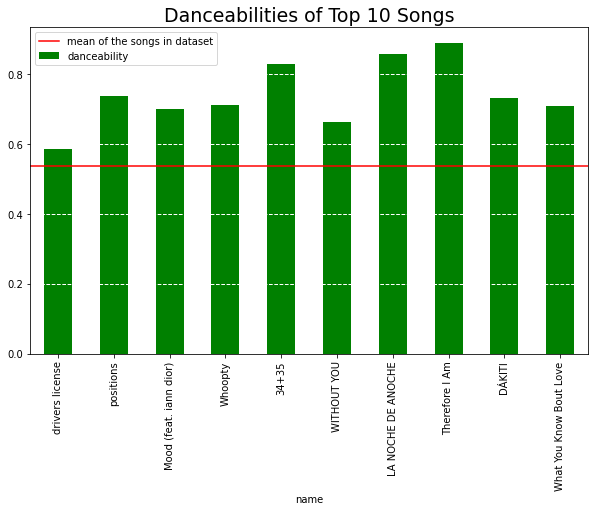

In [ ]:
#This cell plots top 10 songs' danceabilities.
#Red line represents overall average danceability of all songs.

fig, axes = plt.subplots(1, 1, figsize=(10, 6))                 

ax = dftop10S['danceability'].plot.bar(color='green')
ax.axhline(pop_songs['danceability'].mean(), 0, 1, c="r", label='mean of the songs in dataset')
plt.title("Danceabilities of Top 10 Songs", size=19)
ax.grid(color='white', linestyle='--', linewidth=1, axis='y')
plt.legend()

plt.show()

#Since as we can see below, most popular songs have noticeable more danceability.
#So, songs with high danceability tend to be more popular.

In [ ]:
#This cell lists top 10 most popular artists.
pop_artists = df.groupby(["artists"]).mean().sort_values("popularity", ascending = False)
dftop10A=pop_artists[0:10]
pop_artists.head(10)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
artists,,,,,,,,,,,,,,,
"['24kGoldn', 'iann dior']",0.2210,0.700,140526.0,0.722,1.0,0.000000,7.0,0.2720,-3.558,0.0,96.0,0.0369,90.989,0.7560,2020.0
['CJ'],0.1900,0.711,123429.0,0.598,1.0,0.000000,3.0,0.1500,-7.621,0.0,94.0,0.1820,140.175,0.7370,2020.0
"['Bad Bunny', 'ROSALÍA']",0.0303,0.856,203201.0,0.618,0.0,0.000000,7.0,0.0866,-4.892,1.0,94.0,0.2860,81.993,0.3910,2020.0
"['Bad Bunny', 'Jhay Cortez']",0.4010,0.731,205090.0,0.573,1.0,0.000052,4.0,0.1130,-10.059,0.0,93.0,0.0544,109.928,0.1450,2020.0
"['Justin Bieber', 'benny blanco']",0.8640,0.631,149297.0,0.239,1.0,0.000000,11.0,0.1160,-7.071,0.0,92.0,0.0398,79.859,0.0927,2020.0
"['Cardi B', 'Megan Thee Stallion']",0.0194,0.935,187541.0,0.454,1.0,0.000000,1.0,0.0824,-7.509,1.0,92.0,0.3750,133.073,0.3570,2020.0
['Boza'],0.3620,0.725,186133.0,0.756,0.0,0.000685,4.0,0.1030,-5.013,1.0,92.0,0.0572,100.070,0.8280,2020.0
"['Myke Towers', 'Juhn']",0.1220,0.713,232853.0,0.617,0.0,0.000000,8.0,0.0962,-4.637,1.0,91.0,0.0887,168.021,0.6820,2020.0
"['DaBaby', 'Roddy Ricch']",0.2470,0.746,181733.0,0.690,1.0,0.000000,11.0,0.1010,-7.956,1.0,91.0,0.1640,89.977,0.4970,2020.0


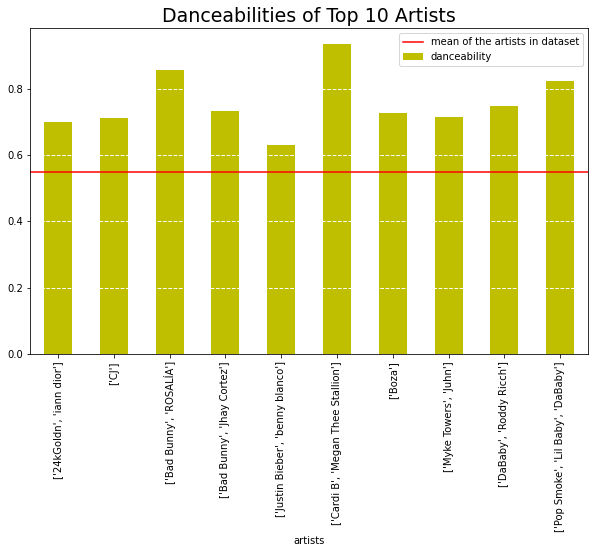

In [ ]:
#This cell plots top 10 artists' danceabilities.
#Red line represents average danceability of all artists.

fig, axes = plt.subplots(1, 1, figsize=(10, 6))                 

ax = dftop10A['danceability'].plot.bar(color='y')
ax.axhline(pop_artists['danceability'].mean(), 0, 1, c="r", label='mean of the artists in dataset')
plt.title("Danceabilities of Top 10 Artists", size=19)
ax.grid(color='white', linestyle='--', linewidth=1, axis='y')
plt.legend()

plt.show()

#Since as we can see below, most popular artists have noticeable more danceability.
#So, artist with high danceability tend to be more popular.

### Analyzing how songs of different genres change with time

In [ ]:
fname2 = "data_w_genres.csv" #This is our data. We needed genres.
join(path_prefix, fname2)
df_genres = pd.read_csv(join(path_prefix, fname2))
df_genres.replace("[]", np.nan, inplace=True)
df_genres=df_genres.dropna()

df_genres.drop(df_genres.iloc[:, 1:df_genres.shape[-1]-1], inplace = True, axis = 1)


In [ ]:
def normalize(artists):           #This function normalizes the artists names according to data_w_genres function.
                                  #The purpose of this function is to make the merging of dataframes easier and more efficent.
  if "," in artists:
    artists = artists[2:artists.index(",")-1]
    return artists
  else:
    artists = artists[2:len(artists)-2]
    return artists

df["artists"] = df["artists"].apply(normalize)

In [ ]:
df_merged = pd.merge(df, df_genres, on='artists', how='inner')   #Merging two dataframes as we need an information from two datas
df_merged["type"] = df_merged["genres"].apply(categorize)

Text(0.5, 1.0, 'Indie')

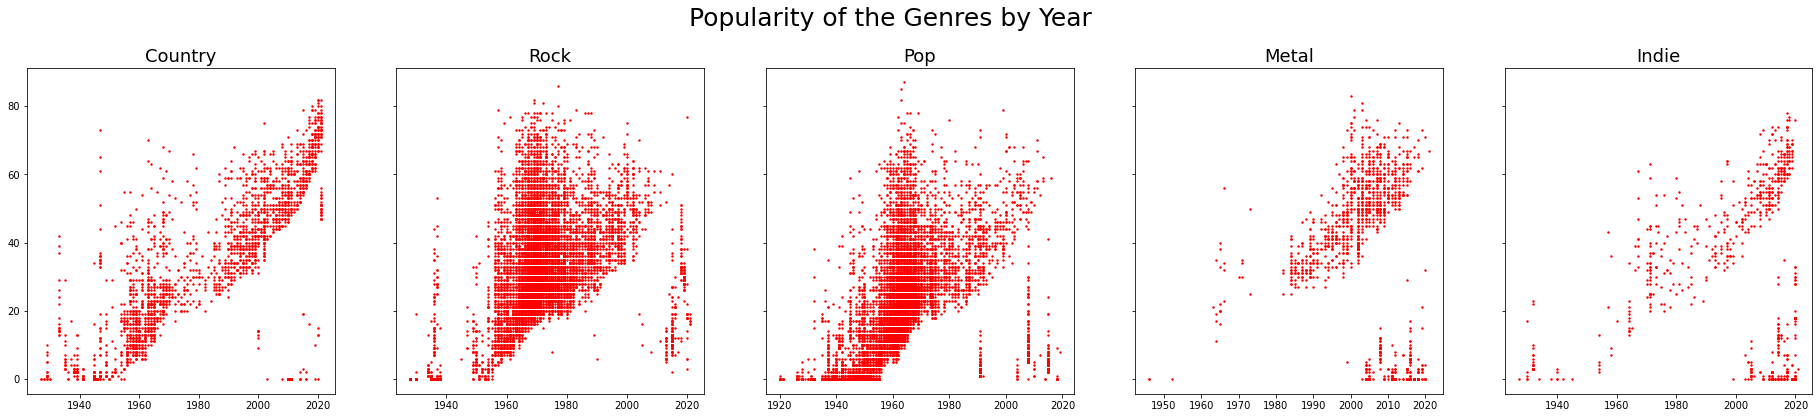

In [ ]:
#Popularity of Genres(Country, Rock, Pop, Metal, Indie)(scatter plot)
#we choose the graph type as scatterplot because we thought that this type of data can be respresented best as scatterplot

df_merged.replace("not classified", np.nan, inplace=True)
df_merged=df_merged.dropna()

fig, axs = plt.subplots(1,5, figsize=(32, 6), sharey=True)
fig.suptitle("Popularity of the Genres by Year", size=25, y=1.02)
axs[0].scatter(df_merged[df_merged["type"] == "Country"]["year"][:10000], df_merged[df_merged["type"] == "Country"]["popularity"][:10000],s=2,c="r")
axs[1].scatter(df_merged[df_merged["type"] == "Rock"]["year"][:10000], df_merged[df_merged["type"] == "Rock"]["popularity"][:10000],s=2, c="r")
axs[2].scatter(df_merged[df_merged["type"] == "Pop"]["year"][:10000], df_merged[df_merged["type"] == "Pop"]["popularity"][:10000],s=2, c="r")
axs[3].scatter(df_merged[df_merged["type"] == "Metal"]["year"][:10000], df_merged[df_merged["type"] == "Metal"]["popularity"][:10000],s=2, c="r")
axs[4].scatter(df_merged[df_merged["type"] == "Indie"]["year"][:10000], df_merged[df_merged["type"] == "Indie"]["popularity"][:10000],s=2, c="r")

axs[0].set_title('Country',size=18)
axs[1].set_title('Rock',size=18)
axs[2].set_title('Pop',size=18)
axs[3].set_title('Metal',size=18)
axs[4].set_title('Indie',size=18)

Text(0.5, 1.0, 'House')

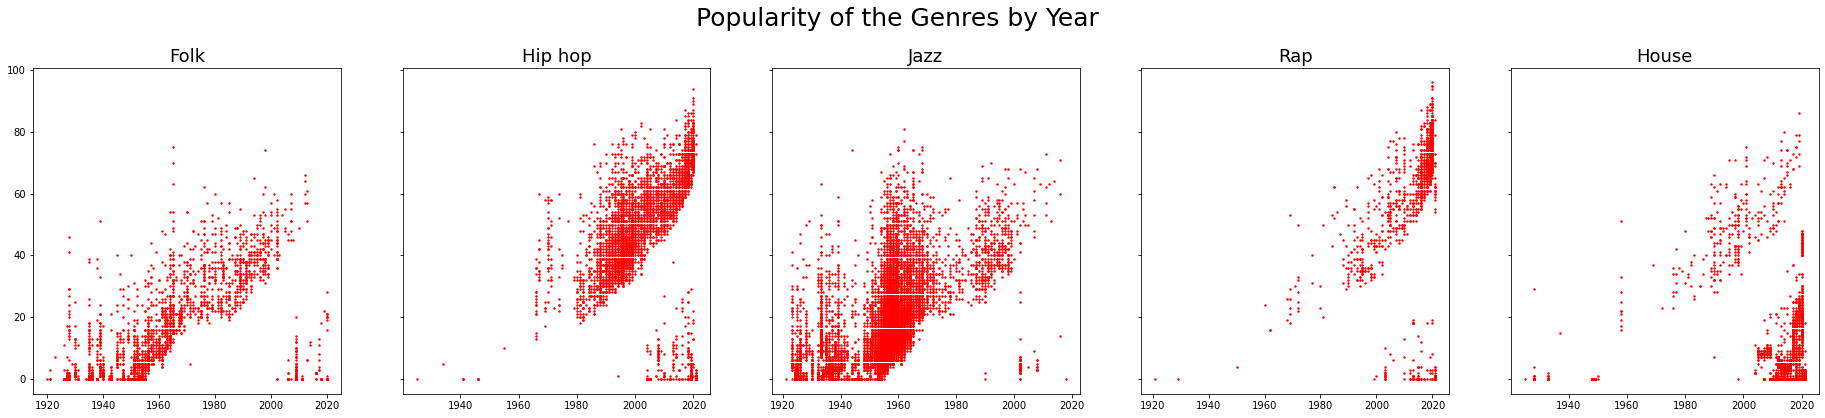

In [ ]:
#Popularity of Genres(Folk, Hip hop, Jazz, Rap, House)(scatter plot)

fig, axs = plt.subplots(1,5, figsize=(32, 6), sharey=True)
fig.suptitle("Popularity of the Genres by Year",size=25, y=1.02)
axs[0].scatter(df_merged[df_merged["type"] == "Folk"]["year"][:10000], df_merged[df_merged["type"] == "Folk"]["popularity"][:10000],s=2, c="r")
axs[1].scatter(df_merged[df_merged["type"] == "Hip hop"]["year"][:10000], df_merged[df_merged["type"] == "Hip hop"]["popularity"][:10000],s=2, c="r")
axs[2].scatter(df_merged[df_merged["type"] == "Jazz"]["year"][:10000], df_merged[df_merged["type"] == "Jazz"]["popularity"][:10000],s=2, c="r")
axs[3].scatter(df_merged[df_merged["type"] == "Rap"]["year"][:10000], df_merged[df_merged["type"] == "Rap"]["popularity"][:10000],s=2, c="r")
axs[4].scatter(df_merged[df_merged["type"] == "House"]["year"][:10000], df_merged[df_merged["type"] == "House"]["popularity"][:10000],s=2, c="r")

axs[0].set_title('Folk',size=18)
axs[1].set_title('Hip hop',size=18)
axs[2].set_title('Jazz',size=18)
axs[3].set_title('Rap',size=18)
axs[4].set_title('House',size=18)

Text(0.5, 1.0, 'Metal')

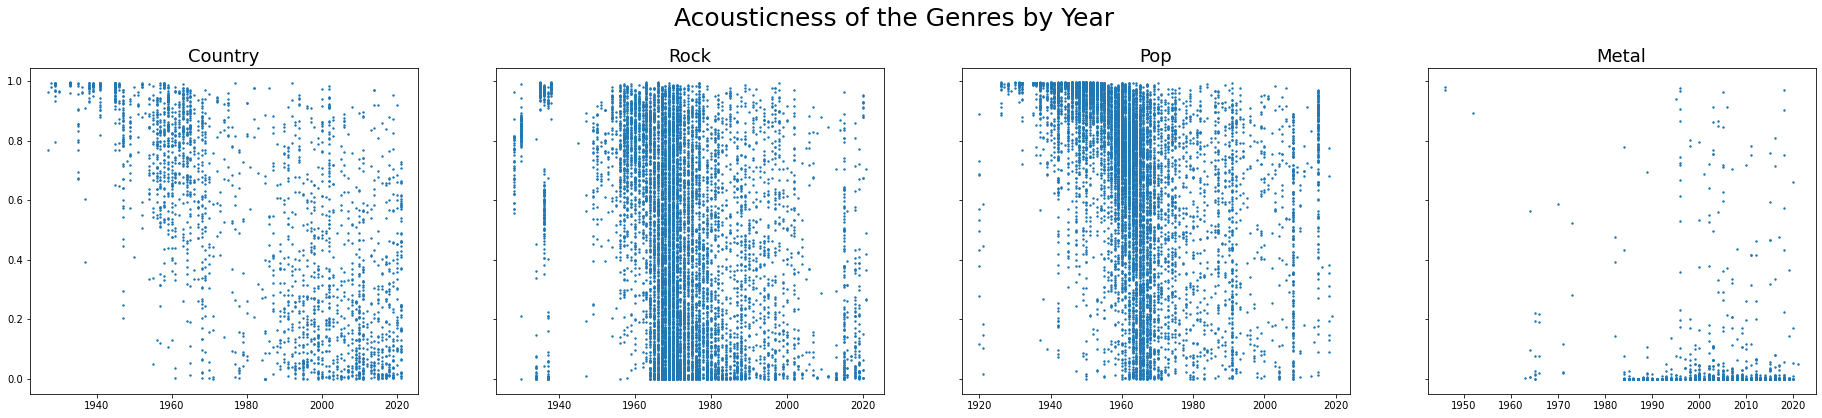

In [ ]:
#Acousticness of Genres(Country, Rock, Pop, Metal)(scatter plot)

fig, axs = plt.subplots(1,4, figsize=(32, 6), sharey=True)
fig.suptitle("Acousticness of the Genres by Year",size=25, y=1.02)
axs[0].scatter(df_merged[df_merged["type"] == "Country"]["year"][:10000], df_merged[df_merged["type"] == "Country"]["acousticness"][:10000],s=2)
axs[1].scatter(df_merged[df_merged["type"] == "Rock"]["year"][:10000], df_merged[df_merged["type"] == "Rock"]["acousticness"][:10000],s=2)
axs[2].scatter(df_merged[df_merged["type"] == "Pop"]["year"][:10000], df_merged[df_merged["type"] == "Pop"]["acousticness"][:10000],s=2)
axs[3].scatter(df_merged[df_merged["type"] == "Metal"]["year"][:10000], df_merged[df_merged["type"] == "Metal"]["acousticness"][:10000],s=2)

axs[0].set_title('Country',size=18)
axs[1].set_title('Rock',size=18)
axs[2].set_title('Pop',size=18)
axs[3].set_title('Metal',size=18)

Text(0.5, 1.0, 'Jazz')

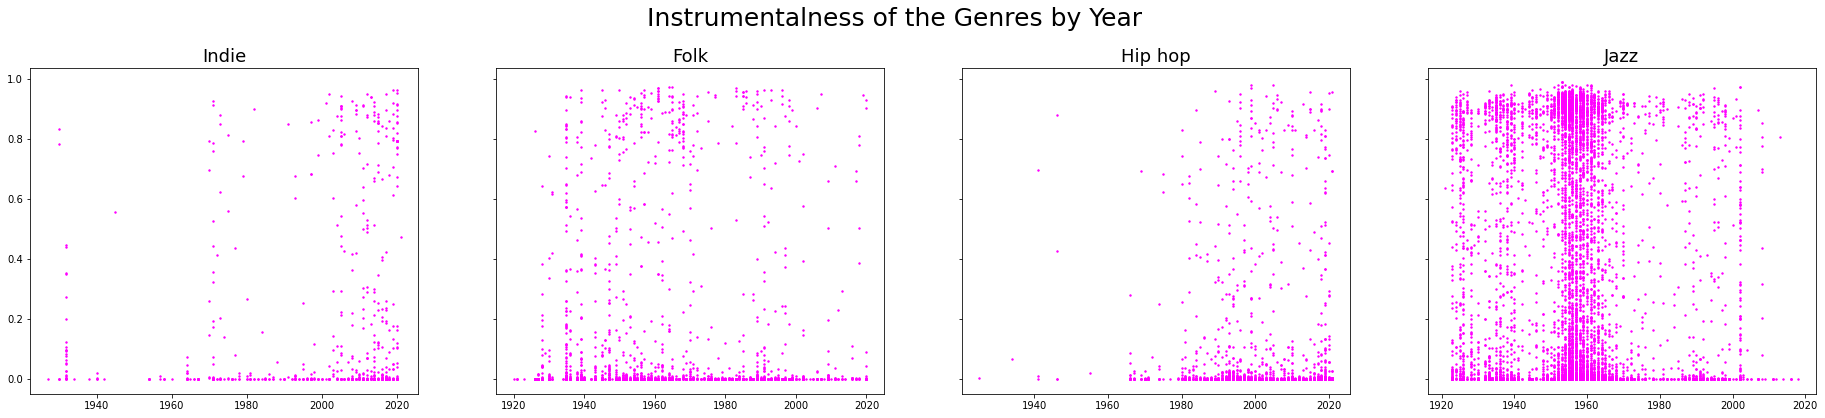

In [ ]:
#Instrumentalness of Genres (Indie, Folk, Hip hop, Jazz)(scatter plot)

fig, axs = plt.subplots(1,4, figsize=(32, 6), sharey=True)
fig.suptitle("Instrumentalness of the Genres by Year", size=25, y=1.02)
axs[0].scatter(df_merged[df_merged["type"] == "Indie"]["year"][:10000], df_merged[df_merged["type"] == "Indie"]["instrumentalness"][:10000],s=2, c="Magenta")
axs[1].scatter(df_merged[df_merged["type"] == "Folk"]["year"][:10000], df_merged[df_merged["type"] == "Folk"]["instrumentalness"][:10000],s=2, c="Magenta")
axs[2].scatter(df_merged[df_merged["type"] == "Hip hop"]["year"][:10000], df_merged[df_merged["type"] == "Hip hop"]["instrumentalness"][:10000],s=2, c="Magenta")
axs[3].scatter(df_merged[df_merged["type"] == "Jazz"]["year"][:10000], df_merged[df_merged["type"] == "Jazz"]["instrumentalness"][:10000],s=2, c="Magenta")

axs[0].set_title('Indie',size=18)
axs[1].set_title('Folk',size=18)
axs[2].set_title('Hip hop',size=18)
axs[3].set_title('Jazz',size=18)

Text(0.5, 1.0, 'Metal')

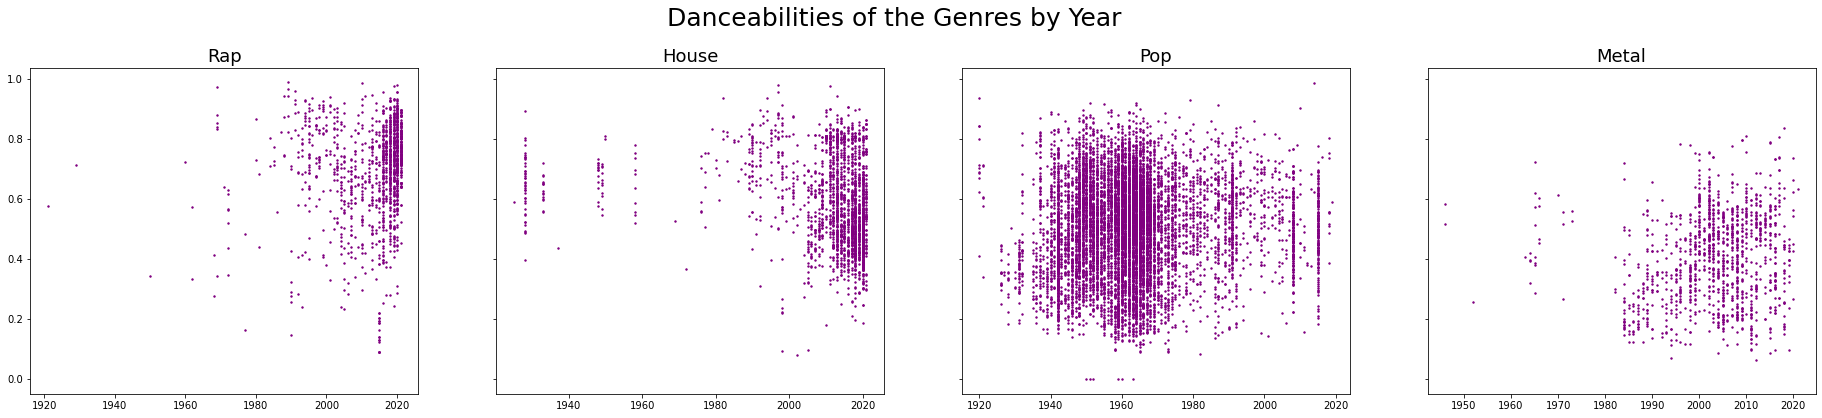

In [ ]:
#Danceability of Genres(Rap, House, Pop, Metal)(scatter plot)

fig, axs = plt.subplots(1,4, figsize=(32, 6), sharey=True)
fig.suptitle("Danceabilities of the Genres by Year", size=25, y=1.02)
axs[0].scatter(df_merged[df_merged["type"] == "Rap"]["year"][:10000], df_merged[df_merged["type"] == "Rap"]["danceability"][:10000],s=2, c="purple")
axs[1].scatter(df_merged[df_merged["type"] == "House"]["year"][:10000], df_merged[df_merged["type"] == "House"]["danceability"][:10000],s=2, c="purple")
axs[2].scatter(df_merged[df_merged["type"] == "Pop"]["year"][:10000], df_merged[df_merged["type"] == "Pop"]["danceability"][:10000],s=2, c="purple")
axs[3].scatter(df_merged[df_merged["type"] == "Metal"]["year"][:10000], df_merged[df_merged["type"] == "Metal"]["danceability"][:10000],s=2, c="purple")

axs[0].set_title('Rap',size=18)
axs[1].set_title('House',size=18)
axs[2].set_title('Pop',size=18)
axs[3].set_title('Metal',size=18)

## Future Work



We have manipulated data to a more comprehensible version. Some basic analysis like most popular songs and artist are made. Also, we found how songs of different genres changed during the time. Now, the data is clearer and ready for further statistical analysis. In the second part, firstly, we will find the relations between features and popularity. Secondly, we will discover the noticable differences between eras. <br>



## Hypothesis Testing


In [ ]:
from sklearn import datasets
from scipy.stats import f_oneway
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
%matplotlib inline


###Sample Hypothesis Test-A1
Hypothesis Test: We want to test whether there is significant differences in terms of popularity for different level of acousticness .

**Null Hypothesis ($H_0$)**: Means of `popularity` is same with different speechiness levels (e.g. $ci_1$ denotes 1st popularity sample).

$ H_0: \mu_{ci_1} = \mu_{ci_2}$

**Alternative Hypothesis ($H_A$)**: Means of `popularity` is not same with different speechiness levels.

$ H_A:$ Means $\mu_{ci_1}, \mu_{ci_2}$ are not same.

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.

In [ ]:
mean_spc = df_merged["speechiness"].mean()

spc_high = df_merged.loc[(df_merged["speechiness"] > mean_spc)]
spc_low = df_merged.loc[(df_merged["speechiness"] <= mean_spc)]

Before applying an appropriate test, we can also visualize these samples to observe the possible statistical difference.

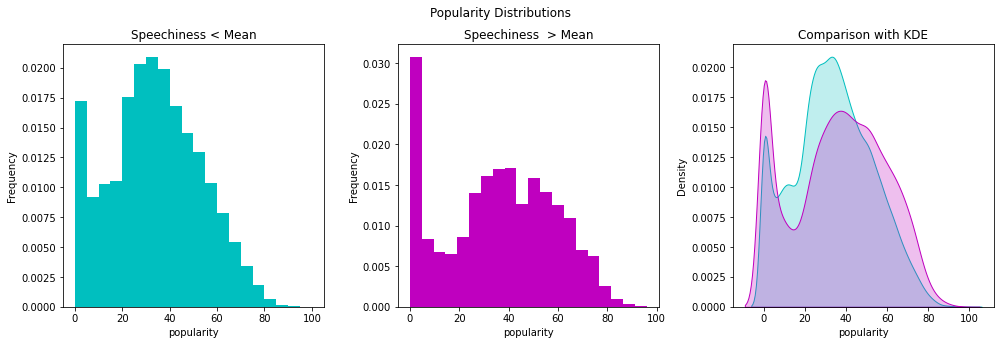

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
        
spc_low['popularity'].plot(kind="hist", ax=ax[0], bins=20, label="completed", color="c", density=True)
ax[0].set_title("Speechiness < Mean")
ax[0].set_xlabel("popularity")

spc_high['popularity'].plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title("Speechiness  > Mean")
ax[1].set_xlabel("popularity")


sns.kdeplot(spc_low['popularity'], shade=True, label="lower than mean", ax=ax[2], color="c")
sns.kdeplot(spc_high['popularity'], shade=True, label="higher than mean", ax=ax[2], color="m")

ax[2].set_title("Comparison with KDE")

plt.suptitle("Popularity Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

There seem to be clear indication that there samples differ in terms of popularity. However, we should apply a statistical test to confirm our visual observation.

In [ ]:
ttest_ind(spc_low['popularity'], spc_high['popularity'])

Ttest_indResult(statistic=-17.195632502308744, pvalue=3.546243490347142e-66)

**Interpreting results:**

> As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that means of popularity levels samples are not the same. Here, we reject the null hypothesis.

###Sample Hypothesis Test-A2
Hypothesis Test: We want to test whether there is significant differences in terms of popularity for different level of acousticness .

**Null Hypothesis ($H_0$)**: Means of `popularity` is same with different duration_ms levels (e.g. $ci_1$ denotes 1st popularity sample).

$ H_0: \mu_{ci_1} = \mu_{ci_2}$

**Alternative Hypothesis ($H_A$)**: Means of `popularity` is not same with different duration_ms levels.

$ H_A:$ Means $\mu_{ci_1}, \mu_{ci_2}$ are not same.

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.

In [ ]:
#Creating sample based on duration.
mean_acc = df_merged["duration_ms"].mean()

duration_high = df_merged.loc[(df_merged["duration_ms"] > mean_acc)] #Derivate new sample from mean_acc; sample with more than average durations.


Before applying an appropriate test, we can also visualize these samples to observe the possible statistical difference.

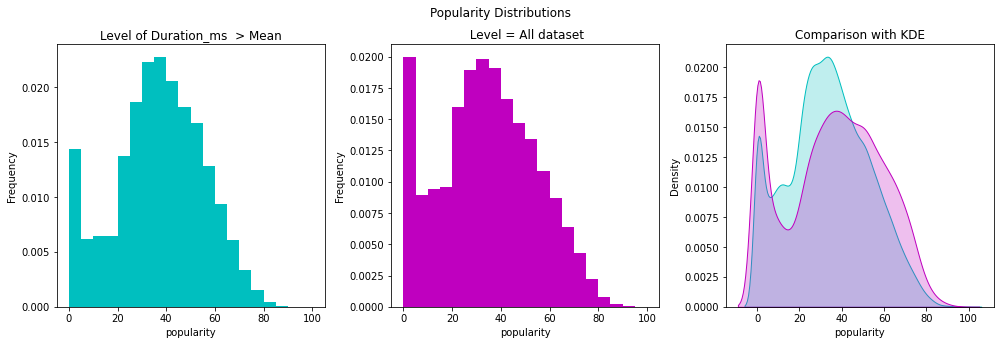

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
        
duration_high['popularity'].plot(kind="hist", ax=ax[0], bins=20, label="completed", color="c", density=True)
ax[0].set_title("Level of Duration_ms  > Mean")
ax[0].set_xlabel("popularity")

df_merged['popularity'].plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title(" Level = All dataset")
ax[1].set_xlabel("popularity")


sns.kdeplot(spc_low['popularity'], shade=True, label="lower than mean", ax=ax[2], color="c")
sns.kdeplot(spc_high['popularity'], shade=True, label="higher than mean", ax=ax[2], color="m")

ax[2].set_title("Comparison with KDE")

plt.suptitle("Popularity Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

There seem to be clear indication that there samples differ in terms of popularity. However, we should apply a statistical test to confirm our visual observation.

In [ ]:
ttest_ind(duration_high['popularity'], df_merged['popularity'])


Ttest_indResult(statistic=22.25934753151168, pvalue=1.4072527683326337e-109)

**Interpreting results:**

> As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that means of popularity levels samples are not the same. Here, we reject the null hypothesis.

###Sample Hypothesis Test-B1
Hypothesis Test: We want to test whether there is significant differences in terms of energy for different decades of Pop.

**Null Hypothesis ($H_0$)**: Means of `energy` samples for all decades values are same (e.g. $ci_1$ denotes 1st energy sample)

$ H_0: \mu_{ci_1} = \mu_{ci_2}$

**Alternative Hypothesis ($H_A$)**: Means of `energy` samples for all decades values are different

$ H_A:$ Means $\mu_{ci_1}, \mu_{ci_2}$ are not same.

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.

In [ ]:
rock_sample = df_merged[df_merged['type'] == "Rock"] #Creating sample based on rock genre.

In [ ]:
#Derivate new samples from rock_sample; 1950's and 2010's rock samples.
sample_P1 = rock_sample.loc[(rock_sample["year"] >= 1950) & (rock_sample["year"] < 1960)]
sample_P2 = rock_sample.loc[(rock_sample["year"] >= 2010) & (rock_sample["year"] < 2020)]


Before applying an appropriate test, we can also visualize these samples to observe the possible statistical difference.

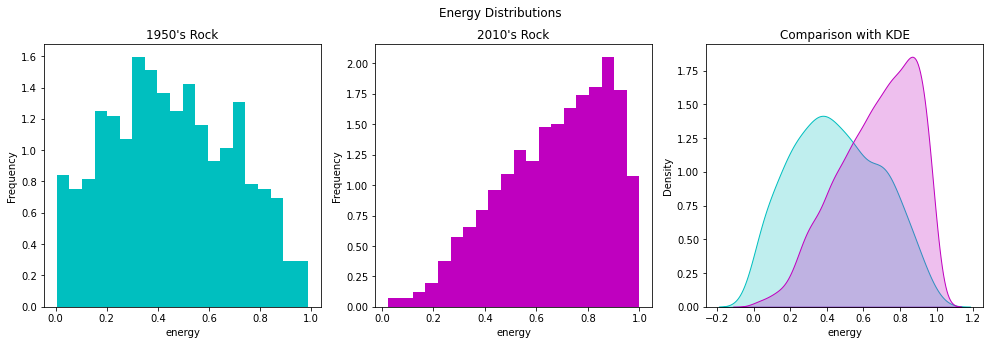

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
        
sample_P1['energy'].plot(kind="hist", ax=ax[0], bins=20, label="completed", color="c", density=True)
ax[0].set_title("1950's Rock")
ax[0].set_xlabel("energy")

sample_P2['energy'].plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title("2010's Rock")
ax[1].set_xlabel("energy")


sns.kdeplot(sample_P1['energy'], shade=True, label="1950's", ax=ax[2], color="c")
sns.kdeplot(sample_P2['energy'], shade=True, label="2000's", ax=ax[2], color="m")

ax[2].set_title("Comparison with KDE")

plt.suptitle("Energy Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

There seem to be clear indication that there samples differ in terms of energy. However, we should apply a statistical test to confirm our visual observation.

In [ ]:
f_stats, p_values = f_oneway(sample_P1['energy'].values, sample_P2['energy'].values)
p_values

1.3119433732545947e-107

**Interpreting results:**

> As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that means of energy levels samples are not the same. Here, we reject the null hypothesis.

###Sample Hypothesis Test-B2
Hypothesis Test: We want to test whether there is significant differences in terms of loudness for different decades of Metal.

**Null Hypothesis ($H_0$)**: Means of `loudness` samples for all decades values are same (e.g. $ci_1$ denotes 1st loudness sample)

$ H_0: \mu_{ci_1} = \mu_{ci_2} = \mu_{ci_3}$

**Alternative Hypothesis ($H_A$)**: Means of `loudness` samples for all decades values are different

$ H_A:$ Means $\mu_{ci_1}, \mu_{ci_2} = \mu_{ci_3}$ are not same.

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.

In [ ]:
metal_sample = df_merged[df_merged['type'] == "Metal"]

In [ ]:
## creating our samples 1960's, 1980's and 2000's Metal
sample_P3 = metal_sample.loc[(metal_sample["year"] >= 1960) & (metal_sample["year"] < 1970)]
sample_P4 = metal_sample.loc[(metal_sample["year"] >= 1980) & (metal_sample["year"] < 1990)]
sample_P5 = metal_sample.loc[(metal_sample["year"] >= 2000) & (metal_sample["year"] < 2010)]

Before applying an appropriate test, we can also visualize these samples to observe the possible statistical difference.

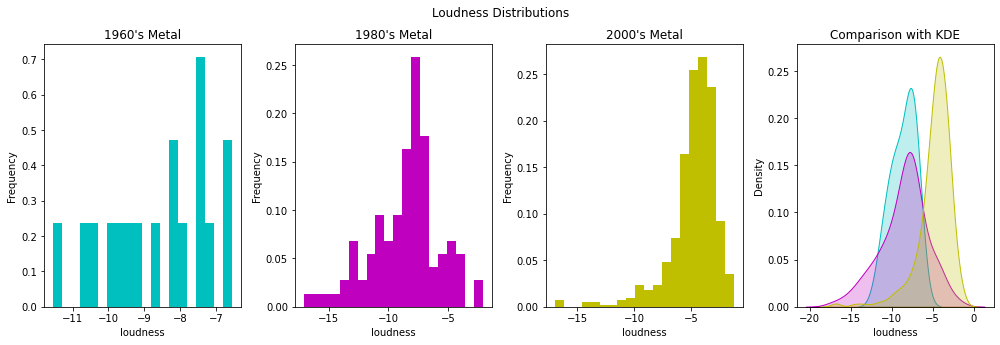

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(14,5))
        
sample_P3['loudness'].plot(kind="hist", ax=ax[0], bins=20, label="completed", color="c", density=True)
ax[0].set_title("1960's Metal")
ax[0].set_xlabel("loudness")

sample_P4['loudness'].plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title("1980's Metal")
ax[1].set_xlabel("loudness")

sample_P5['loudness'].plot(kind="hist", ax=ax[2], bins=20, label="none", color="y", density=True)
ax[2].set_title("2000's Metal")
ax[2].set_xlabel("loudness")

sns.kdeplot(sample_P3['loudness'], shade=True, label="1960's Metal", ax=ax[3], color="c")
sns.kdeplot(sample_P4['loudness'], shade=True, label="1980's Metal", ax=ax[3], color="m")
sns.kdeplot(sample_P5['loudness'], shade=True, label="2000's Metal", ax=ax[3], color="y")
ax[3].set_title("Comparison with KDE")

plt.suptitle("Loudness Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

There seem to be clear indication that there samples differ in terms of color intensities. However, we should apply a statistical test to confirm our visual observation.

In [ ]:
f_stats, p_values = f_oneway(sample_P3['loudness'].values, sample_P4['loudness'].values,sample_P5['loudness'].values)
p_values

3.058222924220594e-49

**Interpreting results:**

> As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that means of loudness levels samples are not the same. Here, we reject the null hypothesis.

###Part C (Extra)

Although we are group of `3`, we have done the work for the groups of `4-5` people. 

###Sample Hypothesis Test-C1
Hypothesis Test: We want to test whether there is significant differences in terms of loudness for different decades of Metal.

**Null Hypothesis ($H_0$)**: Means of `liveness` samples for selected subgenres with same parent genre values are same (e.g. $ci_1$ denotes 1st liveness sample)

$ H_0: \mu_{ci_1} = \mu_{ci_2} = \mu_{ci_3}$

**Alternative Hypothesis ($H_A$)**: Means of `liveness` samples for selected subgenres same parent genre values are different

$ H_A:$ Means $\mu_{ci_1}, \mu_{ci_2} = \mu_{ci_3}$ are not same.

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.

In [ ]:
def specialize(name): #this function classifies the genres in more simplistic way
  if("indie pop" in name):
    return "Indie pop"
  elif("dance pop" in name):
    return "Dance pop"
  elif("country pop" in name):
    return "Country pop"
  else:
    return np.nan
  

df_specialize = df_merged
df_specialize["special"] = df_specialize["genres"].apply(specialize)
df_specialize=df_specialize.dropna()

   

In [ ]:
Indie_pop_sample = df_specialize[df_specialize['special'] == "Indie pop"]
Dance_pop_sample = df_specialize[df_specialize['special'] == "Dance pop"] 
Country_pop_sample = df_specialize[df_specialize['special'] == "Country pop"] 


Before applying an appropriate test, we can also visualize these samples to observe the possible statistical difference.

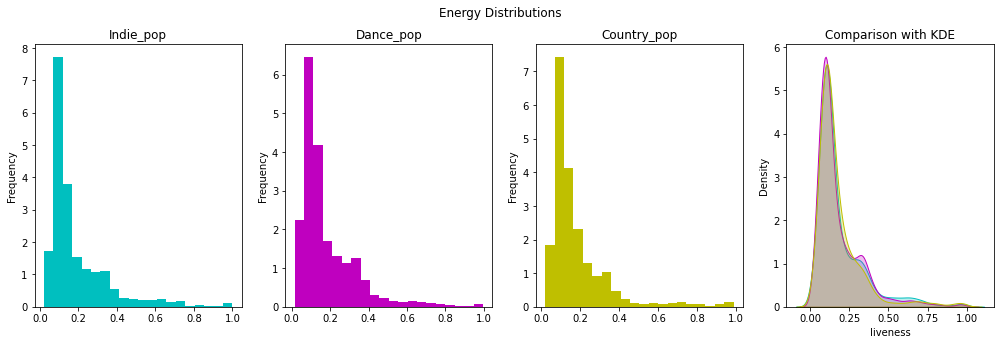

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(14,5))
        
Indie_pop_sample['liveness'].plot(kind="hist", ax=ax[0], bins=20, label="completed", color="c", density=True)
ax[0].set_title("Indie_pop")

Dance_pop_sample['liveness'].plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title("Dance_pop")

Country_pop_sample['liveness'].plot(kind="hist", ax=ax[2], bins=20, label="none", color="y", density=True)
ax[2].set_title("Country_pop")


sns.kdeplot(Indie_pop_sample['liveness'], shade=True, label="1950's", ax=ax[3], color="c")
sns.kdeplot(Dance_pop_sample['liveness'], shade=True, label="2000's", ax=ax[3], color="m")
sns.kdeplot(Country_pop_sample['liveness'], shade=True, label="2000's", ax=ax[3], color="y")

ax[3].set_title("Comparison with KDE")

plt.suptitle("Energy Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

There seem to be clear indication that there samples are same in terms of liveness. However, we should apply a statistical test to confirm our visual observation.

In [ ]:
f_stats, p_values = f_oneway(Indie_pop_sample['liveness'].values, Dance_pop_sample['liveness'].values, Country_pop_sample['liveness'].values)
p_values

0.15012062796950243

**Interpreting results:**
>As we take the level of significance as 0.05, this time we fail to reject the null hypothesis since p-value(0.15) is higher 0.05. We can conclude that `selected subgenres with same parent genre` and `means of liveness` are independent. 

##Machine Learning

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


###Predicting popularity

- To get more accuracte results in our machine learning model, we changed the genre names as numbers.

In [ ]:
def numerize(name): #this function classifies the genres in more simplistic way
  if("pop" in name):
    return 0
  elif("rock" in name):
    return 1
  elif("metal" in name):
    return 2
  elif("indie" in name):
    return 3
  elif("folk" in name):
    return 4
  elif("hip hop" in name):
    return 5
  elif("jazz" in name):
    return 6
  elif("rap" in name):
    return 7
  elif("house" in name):
   return 8
  elif("country" in name):
    return 9
  else:
    return 10

df_merged["type_num"] = df_merged["type"].apply(numerize)


In [ ]:
mean = df_merged["popularity"].mean()
def popularity_class(pop): #this function help us to find the popularity level
  if pop <= mean:
    return 0
  else:
    return 1
   

df_merged["pop_rank"] = df_merged["popularity"].apply(popularity_class)

df_ml = df_merged.drop(["artists", "year", "type","genres", "id", "name", "release_date","special", "popularity"], axis=1)

features = df_ml.drop(["pop_rank"], axis=1)
target = df_ml["pop_rank"]

X_train, X_remaining, y_train, y_remaining = train_test_split(features, target,random_state=0, test_size=0.20)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, random_state=0, test_size=0.50)      
                                                      
                                                       

- We split our dataset into training, validation and testing data.
- We dropped the irrelevant attributes such as name and genres in order to    achieve efficent and accurate datas to train our model

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

rf_predictions = model_rf.predict(X_val)

- Then ,we used random forest model because it suits our purpose better compared to other machine learning models

- Below you can see the hyper-parameters of the random forest

In [ ]:
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

- Now we will use cross validation to find the best hyper parameters for our machine learning model 
(since it searches the best parameters, the code takes **approximately 10mins**)

In [ ]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 2)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [6, 7]
# Minimum number of samples required to split a node
min_samples_split = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap}

rf_Model = RandomForestClassifier()

rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = -1)

rf_Grid.fit(X_train, y_train)

print(rf_Grid.best_params_)
print(f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print(f'Validation Accuracy - : {rf_Grid.score(X_val,y_val):.3f}')


Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  9.4min finished


{'bootstrap': True, 'max_depth': 7, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}
Train Accuracy - : 0.713
Validation Accuracy - : 0.709


- Now we will analyze which features are important for our machine learning model

In [ ]:
feature_list = features

# Get importance list from model
importances = list(model_rf.feature_importances_)

# Create list of tuples by combining(zip) feature list and and importance list 
feature_importance = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort features by importance
feature_importances = sorted(feature_importance, key = lambda x: x[1], reverse = True)

# Print top 5 features 
for pair in feature_importances[:10]:
  print("Variable: {:2}   Importance: {}".format(*pair))

Variable: acousticness   Importance: 0.14
Variable: duration_ms   Importance: 0.11
Variable: loudness   Importance: 0.11
Variable: energy   Importance: 0.09
Variable: danceability   Importance: 0.08
Variable: instrumentalness   Importance: 0.08
Variable: liveness   Importance: 0.08
Variable: speechiness   Importance: 0.08
Variable: tempo   Importance: 0.08
Variable: valence   Importance: 0.08


- As we see from importance list, key and mode attributes are not important for our model so we discard them too

Text(0.5, 1.0, 'Feature Importances')

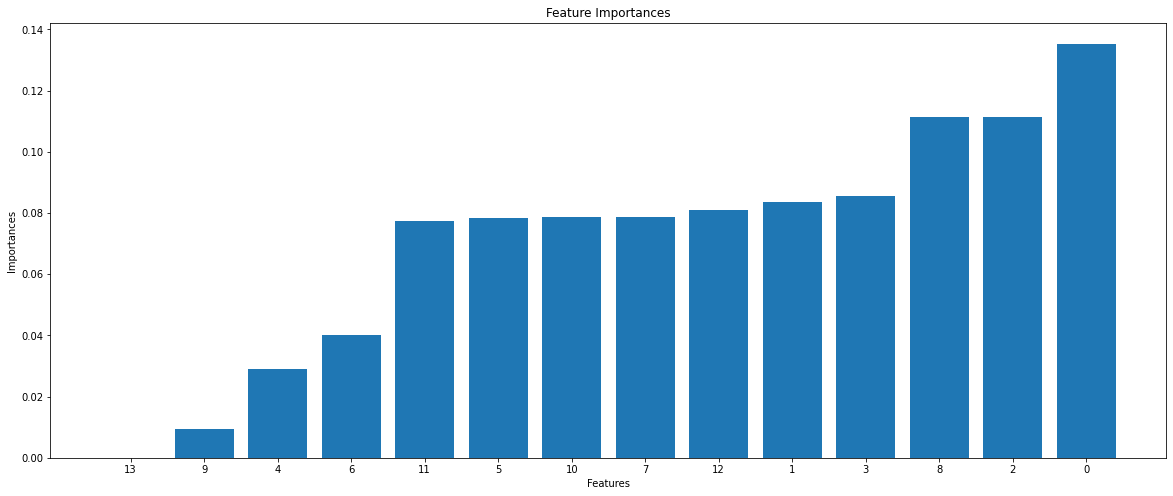

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
index=np.argsort(importances)
arr_sorted=[]
for i in index:
  arr_sorted.append(importances[i])

x=np.arange(0,len(importances))
ax.set_xticks(x)
ax.set_xticklabels(index)
ax.bar(x,arr_sorted)
plt.xlabel("Features")
plt.ylabel("Importances")
plt.title("Feature Importances")

In [ ]:
features = df_ml.drop(["pop_rank","key","mode"], axis=1)
target = df_ml["pop_rank"]

X_train, X_remaining, y_train, y_remaining = train_test_split(features, target,random_state=0, test_size=0.20)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, random_state=0, test_size=0.50)  

model_rf = RandomForestClassifier(bootstrap = True, max_depth = 7, max_features = "auto", min_samples_split = 2, n_estimators=100, random_state=42, criterion ="entropy")
model_rf.fit(X_train, y_train)
rf_predictions = model_rf.predict(X_val)
rf_acc = accuracy_score(y_val, rf_predictions)
print("Random Forest Accuracy using validation data:"+str(rf_acc)) 


Random Forest Accuracy using validation data:0.7085241110569898


- applying the cross validation to see our model with various outcomes

In [ ]:
accuracies = cross_val_score(model_rf, X_train, y_train, cv=5, scoring="accuracy")
accuracies

array([0.70563166, 0.70496195, 0.71111111, 0.70336094, 0.70366537])

- Finally, when we've chosen the best hyperparameter(s) and trained a 'best' model using those best hyperparameteres, we test the 'best' model one final time using the test data. 

In [ ]:
rf_predictions = model_rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy using test data:"+str(rf_acc))

Random Forest Accuracy using test data:0.7134229495421781


###Song recommendation system

Initially we will manipulate our dataframe for our purpose

In [ ]:
df_merged["Name_Artists"] = df_merged["name"] + "-" + df_merged["artists"]
df_merged["Name_Artists_index"] = df_merged["name"] + "-" + df_merged["artists"]
df_knn = df_merged.drop(["year", "type","genres","key","mode" ,"id","release_date","special","pop_rank","name","artists"], axis=1)


In [ ]:
df_knn = df_knn.set_index("Name_Artists_index")    # this modification is required for detecting songs
df_knn

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,type_num,Name_Artists
Name_Artists_index,,,,,,,,,,,,,,
Comme à l'époque-ST,0.3810,0.936,166113,0.372,1,0.000000,0.0830,-11.634,0,0.4550,133.047,0.222,10,Comme à l'époque-ST
YP-ST,0.6890,0.690,144588,0.324,1,0.000000,0.2820,-13.748,0,0.0726,130.024,0.265,10,YP-ST
Radar-ST,0.1170,0.842,227500,0.382,1,0.000000,0.0882,-10.918,0,0.5090,137.980,0.493,10,Radar-ST
Four-ST,0.4340,0.685,244219,0.458,1,0.000001,0.3040,-8.903,0,0.2600,149.987,0.456,10,Four-ST
Honey-ST,0.6850,0.799,160105,0.299,1,0.000015,0.1180,-12.239,0,0.0704,98.960,0.176,10,Honey-ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LMK-Lil Xxel,0.0292,0.748,188293,0.457,0,0.000294,0.4440,-7.560,71,0.0465,123.035,0.464,10,LMK-Lil Xxel
10years vintage - LiVE from 2020.3.5 @EBISU LIQUIDROOM-SPiCYSOL,0.2820,0.608,313253,0.368,0,0.000002,0.0908,-8.539,12,0.0278,125.941,0.212,10,10years vintage - LiVE from 2020.3.5 @EBISU LI...
Saint Bernard-Lincoln,0.8250,0.695,103343,0.232,0,0.000000,0.5900,-11.010,68,0.0972,100.488,0.451,10,Saint Bernard-Lincoln


User should enter the songs in following format  song1-artist1,song2-artist2,song3-artist3

In [ ]:
song_list = input("Please enter the songs and artists in format of name1-artist1,name2-artist:  ").split(",")

Please enter the songs and artists in format of name1-artist1,name2-artist:  Bir İhtimal Daha Var O Da Ölmek Mi Dersin-Safiye Ayla,WANNABE-ITZY,God’s Menu-Stray Kids,Everybody Hates Me-Tom MacDonald,anemone-slenderbodies


- We created two dataframes to avoid recommending the same song given from user.
- First dataframe is created for searching the song in dataframe to find its attributes.
- Second dataframe which does not have songs given by user is created for our machine learning model. 


In [ ]:
df_knn_dropped = df_knn
for x in song_list:
  df_knn_dropped =  df_knn_dropped.drop(x,axis = 0)

In [ ]:
# set the hyperparameter k
k=10
# generate the model
model_knn = KNeighborsClassifier(k, metric="euclidean")

knn_features = df_knn_dropped.iloc[:,:-1].values
knn_target = df_knn_dropped.iloc[:,-1].values
# fit data
model_knn.fit(knn_features, knn_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
df_knn = df_knn.iloc[:,:-1]
recommendation_list = []
for x in song_list: 
  j = df_knn.loc[x]
  song = np.array([j.to_list()]) 
  # now we can make the prediction
  # pred is just another numpy array
  # that stores the predicted labels
  pred = model_knn.predict(song)
  recommendation_list.append(pred[0])


- After getting input and creating our model we print the recommended songs to user

In [ ]:
for i in range(len(song_list)):
  print(f"Song recommendation for '{song_list[i]}' is '{recommendation_list[i]}'.")

Song recommendation for 'Bir İhtimal Daha Var O Da Ölmek Mi Dersin-Safiye Ayla' is 'Aansoo Bhari Hai Ye Jeevan Ki - Male Vocals-Mukesh'.
Song recommendation for 'WANNABE-ITZY' is 'PICK IT UP (feat. A$AP Rocky)-Famous Dex'.
Song recommendation for 'God’s Menu-Stray Kids' is 'After Party-Don Toliver'.
Song recommendation for 'Everybody Hates Me-Tom MacDonald' is 'Paparazzi-Lady Gaga'.
Song recommendation for 'anemone-slenderbodies' is 'A Strange Kind of Love - Version One-Peter Murphy'.
